# MT09 - TP6 - Automne 2024

Taken from https://fdevuyst.jimdofree.com/

### Approximation aux moindres carrés


#### Approximation affine par morceaux

On considère le nuage de points suivants donnés par les tableaux $x$ et $y$ du script code python ci-dessous:

[0.80139283 0.34582056 0.67521648 1.84960944 2.30785782]


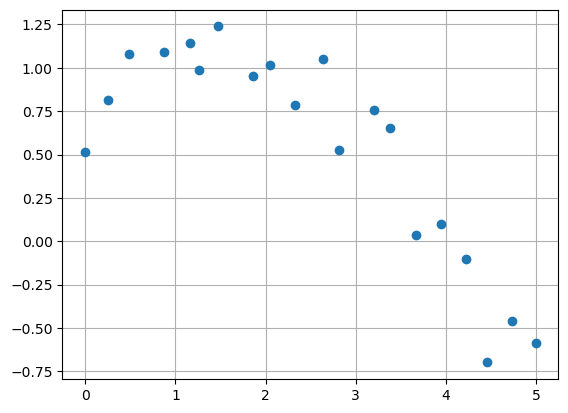

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 20
x = np.linspace(0.0, 5.0, N) + 0.05*np.random.randn(N)
y = 0.8 + 0.5*x-x**2/6 + 0.2*np.random.randn(N)
plt.plot(x, y, 'o'); plt.grid()
print(np.random.randn(5))
plt.rcParams["figure.figsize"] = 5,3 # taille de la figure

On souhaite représenter ce nuage de points par une ligne brisée en minimisant les écarts aux carrés entre les points et la ligne brisée.
Dans un premier temps, coder la fonction dite chapeau ```y = phi(x)``` définie par

$$
\phi(x) = \max(0, |1-x|).
$$

On cherche ensuite une approximation $f(x)$ de la forme

$$
f(x) = \sum_{i=0}^5 \, u_i\, \phi(x-i),
$$
où les $u_i$ sont les inconnues. Réécrire le problème aux moindres carrés

$$
\min_{(u_0,...,u_5)} \quad \frac{1}{2}\sum_{j=1}^N [f(x_j)-y_j]^2
$$

sous la forme

$$
\min_u \quad \frac{1}{2} \|Au - y\|^2
$$
en déterminant la matrice $A$. Coder en python la matrice $A$, résoudre les équations normales et tracez sur le même graphique le nuage de points et la fonction d'approximation $f(x)$ ainsi trouvée. Afficher le vecteur $u$. Comment interprétez-vous les valeurs $u_i$ de $u$ ?

[ 0.63344796  1.20573802  0.95269794  0.80502127 -0.0695907  -0.68247665]


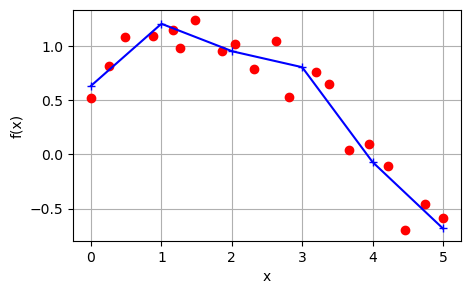

In [2]:
def phi(x):
    y = np.maximum(0*x, 1-np.abs(x))
    return y

A = np.zeros((N, 6))
for i in range(0,N):
    for j in range(0,6):
        A[i,j] = phi(x[i] - j)

import numpy.linalg as la
u = la.solve(A.T@A, A.T@y)

def f(x, u):
    n = u.size
    y = 0*x
    for i in range(0,6):
        y += u[i] * phi(x-i)
    return y

print(u)
plt.plot(x, y, 'or')
xi = np.linspace(0, 5, 200)
yi = f(xi, u)
plt.plot(xi, yi, '-b'); plt.grid()
plt.plot(range(0,6), u, '+b'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.rcParams["figure.figsize"] = 6,4 # taille de la figure

#### Recherche d'une ellipse passant par un nuage de points

On considère le nuage de points $(x_i,y_i)$, $i=1,...,N$ générés par le script python ci-dessous :

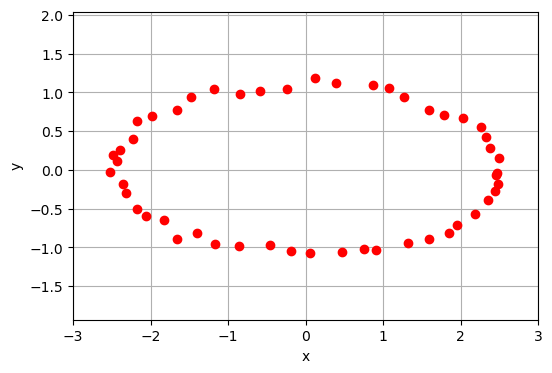

In [3]:
a = 2.5
b = 1.1
N = 50
theta = np.linspace(0, 2*np.pi, N)
xi = a * np.cos(theta) + 0.05*np.random.randn(N)
yi = b * np.sin(theta) + 0.05*np.random.randn(N)
plt.plot(xi, yi, 'or'); plt.axis("equal"); plt.grid()
plt.xlim([-3, 3]); plt.xlabel('x'); plt.ylabel('y');

Par ces points, on va essayer de faire passer "au mieux' une ellipse de paramètres d'axe
$\hat a$ et $\hat b$, d'équation 

$$
\frac{x^2}{\hat a^2} + \frac{y^2}{\hat b^2} = 1
$$

ou, de manière équivalente, d'équations paramétrées

$$
\begin{array}{l}
x(\theta) = \hat a \cos(\theta), \\
y(\theta) = \hat b \sin(\theta), \quad \theta\in[0, 2\pi].
\end{array}
$$

On pourrait chercher $(\hat a,\hat b)$ qui réalisent le minimum de

$$
\min_{(a,b)} \quad \frac{1}{2} \sum_{i=1}^n \left[ \frac{x_i^2}{\hat a^2} + \frac{y_i^2}{\hat b^2}-1\right]^2
$$

mais ce dernier ne peut pas être mis sous la forme $\min_u \frac{1}{2} \|Au-b\|^2$. On considère plutôt le 
problème aux moindres carrés

$$
\min_{u=(u_1,u_2)} \quad \frac{1}{2} \sum_{i=1}^n \left[ x_i^2\, u_1 + y_i^2\, u_2 -1\right]^2
$$
puis on fera $\hat a = \frac{1}{\sqrt{u_1}}$ et $\hat b = \frac{1}{\sqrt{u_2}}$. Ecrire ce problème de minimisation sous la forme

$$
\min u \quad \frac{1}{2}\, \|Au-b\|^2
$$

où l'on déterminera la matrice $A$ et le second membre $b$. Résoudre les équations normales, calculer
$\hat a$ et $\hat b$. Sur le même graphique, tracer le nuage de points $(x_i,y_i)$ et l'ellipse de pramètres
d'axe $\hat a$ et $\hat b$.

[2.49183366062832, 1.1019539783417536]


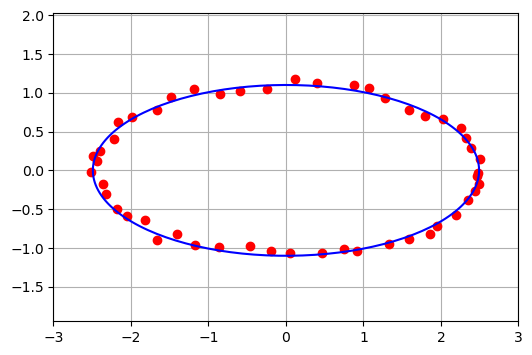

In [4]:
A = np.zeros((N,2))
A[:,0] = xi**2
A[:,1] = yi**2
y = np.ones(N)
u =  la.solve(A.T@A, A.T@y) # Equations normales
# u1 = 1/a^2, u2 = 1/b^2
a = 1.0 / np.sqrt(u[0])
b = 1.0 / np.sqrt(u[1])
theta = np.linspace(0, 2*np.pi, 200)
x = a * np.cos(theta)
y = b * np.sin(theta)
plt.plot(xi, yi, 'or')
plt.plot(x, y, '-b')
plt.grid(); plt.axis('equal'); plt.xlim([-3, 3])
print([a,b])

#### Identification de paramètres d'un système masse-ressort

On considère ici un système masse-ressort linéaire avec amortissement, $m$ est la masse, $k$ est le coefficient de raideur du ressort et $a$ est le coefficient d'mortissement. Le mouvement de la masse est gouverné par l'équation
différentielle du second ordre:

$$
m \ddot{x}(t) + a \dot x(t) + k x(t) = 0
$$

où $x(t$ représente la position de la masse au temps $t$.
L'équation caractéristique correspondante est:

$$
r^2 + \frac{a}{m} r + \frac{k}{m} = 0
$$

avec le discriminant $\Delta$ fonction de $m$, $k$ et $a$ :

$$
\Delta = \left(\frac{a}{m}\right)^2 - 4 \frac{k}{m}.
$$

On suppose $\Delta<0$, si bien que la masse à un mouvement oscillatoire amorti. Sans conditions initiales, la solution générale est de la forme

$$
x(t) = A\, \exp(-\frac{a}{2m}t)\, \cos(\frac{\sqrt{-\Delta}}{2} t) 
+ B\, \exp(-\frac{a}{2m}t)\, \sin(\frac{\sqrt{-\Delta}}{2} t) 
$$

avec deux constantes arbitraires $A$ et $B$. Dans la suite, on considère $m=1$, $a=0.4$ et $k=11$ et on suppose $A=1$ et $B=0$ correspondant à $x(0)=1$ et $\dot x(0) = -0.2$. La solution est donc

$$
x(t) = \exp(-\frac{a}{2m}t)\, \cos(\frac{\sqrt{-\Delta}}{2} t).
$$

Sur brouillon, calculez $\dot x(t)$ et $\ddot x(t)$. Ecrire une fonction 

```
x, xdot, xdotdot = xressort(t)
``` 

qui retourne les valeurs $x(t)$, $\dot x(t)$ et $\ddot x(t)$ au temps $t$. Afficher le résultat de
```xressort(0)```.

In [5]:
m = 1
a = 0.4
k = 11

def xressort(t):
    Delta = (a/m)**2 - 4.0*(k/m)
    x = np.exp(-0.5*a/m*t) * np.cos(np.sqrt(-Delta)*t/2)
    xdot = -0.5*a/m *x - 0.5*np.sqrt(-Delta)*np.exp(-0.5*a/m*t)*np.sin(np.sqrt(-Delta)*t/2)
    xdotdot = -0.5*a/m*xdot + 0.25*a/m*np.sqrt(-Delta)*np.exp(-0.5*a/m*t)*np.sin(np.sqrt(-Delta)*t/2)\
              + 0.25*Delta*np.exp(-0.5*a/m*t)*np.cos(np.sqrt(-Delta)*t/2)
    return x, xdot, xdotdot

print(xressort(0))

(1.0, -0.2, -10.920000000000002)


L'exercice consiste à étudier, à partir de la connaissance de la position $x(t^n)$, la vitesse $\dot x(t^n)$ et l'accélération $\ddot x(t^n)$ à différents instants $t^n$, connaissant la masse $m$, on est en mesure d'identifier les caractéristiques mécaniques du ressort, c'est-à-dire la raideur $k$ et l'amortissement $a$. Pour chaque instant $t^n$, on a donc

$$
\ddot x(t^n) = - \frac{a}{m}\, \dot x(t^n) - \frac{k}{m}\, x(t^n)
$$

Les mesures de $x(t)$, $\dot x(t)$ et $\ddot x(t)$ ont sujettes à des incertitudes de mesures représentées par un bruit gaussien. Considérez le code python ci-dessous pour la génération de données. Dans ce cas,

$$
\ddot x(t^n) \approx - \frac{a}{m}\, \dot x(t^n) - \frac{k}{m}\, x(t^n).
$$

In [6]:
N = 200
t = np.linspace(0, 10, N)
x, xdot, xdotdot = xressort(t)
x = x*(1 + 0.02*np.random.randn(N))
xdot = xdot*(1 + 0.02*np.random.randn(N))
xdotdot = xdotdot*(1 + 0.02*np.random.randn(N))

On considère le problème aux moindres carrés

$$
\min_{u=(k,a)}\quad \frac{1}{2} \sum_{n=1}^N \left[ \ddot x(t^n) + \frac{a}{m} \dot x(t^n)
+ \frac{k}{m} x(t^n)\right]^2.
$$

Ecrire le problème sous la forme matricielle

$$
\min_{u=(k,a)} \quad \frac{1}{2} \|A u - b\|^2
$$

en déterminant la matrice $A$ et le second membre $b$. Résoudre les équations normales et affichez les valeurs
estimées $(\hat k, \hat a)$ et $k$ et $a$.

In [7]:
A = np.zeros((N, 2))
b = - xdotdot
A[:,0] = xdot
A[:,1] = x
u = la.solve(A.T@A, A.T@b) # Resolution des équations normales
print(A.T@A, "\n", u)
ahat, khat = u
print('k_estim = ', khat, ', a_estim = ', ahat);

[[269.04299746 -10.23352893]
 [-10.23352893  25.02923159]] 
 [ 0.40249485 11.0686141 ]
k_estim =  11.068614098738006 , a_estim =  0.402494853779973


Sur le même graphique, tracer la solution exacte $x(t)$ et $\hat x(t)$ correspondant à la solution de paramètres mécaniques estimés $\hat k$ et $\hat a$.

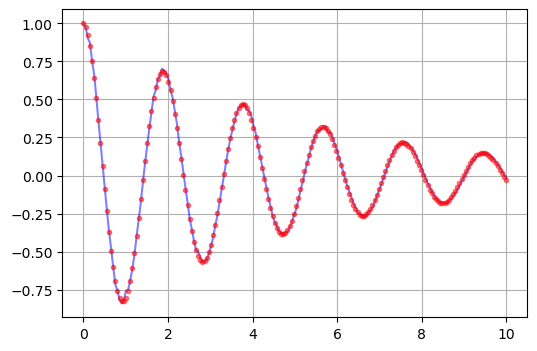

In [8]:
Deltahat = (ahat/m)**2 - 4.0*(khat/m)
xhat = np.exp(-0.5*ahat/m*t) * np.cos(np.sqrt(-Deltahat)*t/2)
plt.plot(t, x, '-b', alpha =  0.5)
plt.plot(t, xhat, '.r', alpha = 0.5)
plt.grid()
plt.rcParams["figure.figsize"] = 8,5 # taille de la figure